In [1]:
from sklearn import decomposition
import pandas
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# !pip install palettable
from palettable.colorbrewer.qualitative import Dark2_8

datapath = '../../../data/'
processed_data_regular_season = datapath + 'processed/RegularSeasonTeamStats/'
processed_data_extra = datapath + 'processed/RegularSeasonExtraStats/'

colors = Dark2_8.mpl_colors

def plot_scree(X):
    pca = decomposition.PCA()
    pca.fit(X)
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(111)
    ax.plot(pca.explained_variance_ratio_, linewidth=2)
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance')
    
def plot_components(X, n):
    pca = decomposition.PCA()
    pca.fit(X)
    c = pca.components_
    fig = plt.figure(figsize=(16,9))
    width = 0.9 / len(c)
    ind = list(range(0, len(c)))
    for i in range(0, n):
        ax = fig.add_subplot(111)
        ax.bar([x + width*i for x in ind], c[i], width=width, color=colors[i])
    ax.set_xticklabels(X.columns.values, rotation=45, ha='left')
    
def plot_component(X, n, feature_names):
    pca = decomposition.PCA()
    pca.fit(X)
    feature_importance = pca.components_[n]
    # make importances relative to max importance
    feature_importance = 100 * (feature_importance / (feature_importance.max() - feature_importance.min()))
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(16,9))
    plt.subplot(111)
    plt.barh(pos, feature_importance, align='center')
    plt.yticks(pos, feature_names)
    plt.xlabel('Relative Importance')

# Scree Visualization
## Kaggle Only

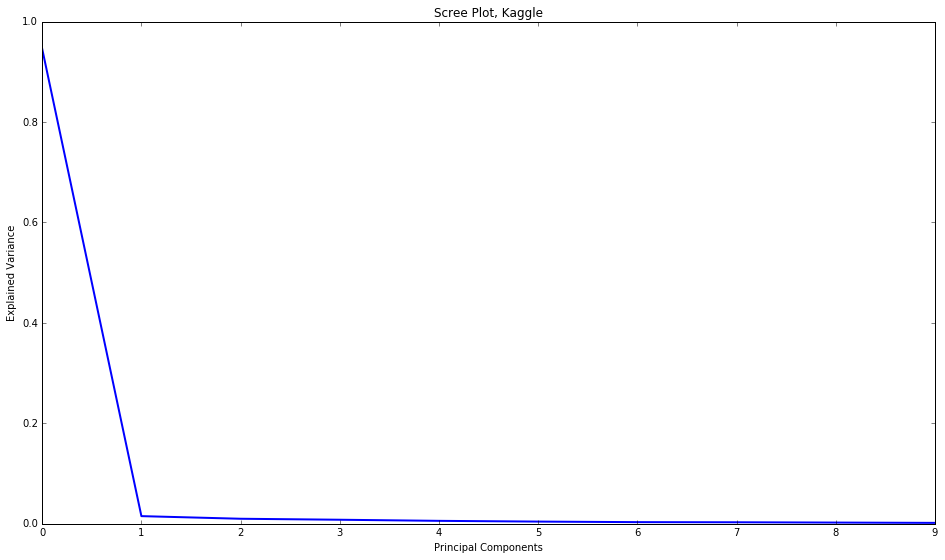

In [2]:
DetailedStats = pandas.read_csv(processed_data_regular_season + 'RegularSeasonDetailedTeamStats2015.csv')
AccuracyStats = pandas.read_csv(processed_data_extra + 'RegularSeasonAccuracyStats2015.csv') 

all_detailed_features = ['WblkAvg', 'LblkAvg', 'WorAvg', 'LfgaAvg', 'WtoAvg', 'LpfAvg', 'LtoAvg', 'LscoreAvg', 'LfgmAvg', 
'WftmAvg', 'LstlAvg', 'WfgmAvg', 'Wfga3Avg', 'WftaAvg', 'WpfAvg', 'Lfgm3Avg', 'LftaAvg', 'WfgaAvg', 'LdrAvg', 'WstlAvg', 
            'WscoreAvg', 'WdrAvg', 'LorAvg', 'LftmAvg', 'Lfga3Avg', 'Team_Name', 'GameCount', 'Wfgm3Avg', 'WastAvg', 'LastAvg']
avg_features = ['WblkAvg', 'WorAvg', 'WtoAvg', 'WftmAvg', 'WfgmAvg', 'Wfga3Avg', 'WftaAvg', 'WpfAvg', 'WfgaAvg', 'WstlAvg', 
            'WscoreAvg', 'WdrAvg', 'Wfgm3Avg', 'WastAvg']
avg_features = ['WblkAvg', 'WorAvg', 'WtoAvg', 'WftmAvg', 'WfgmAvg', 'WpfAvg', 'WstlAvg', 'WdrAvg', 'Wfgm3Avg', 'WastAvg']
acc_features = ['Wft_acc', 'Wfg3_acc','Wfg_acc']
features_named = [x.replace('W', '').replace('Avg', '') for x in (avg_features + acc_features)]

"""    
wfgm - field goals made
wfga - field goals attempted
wfgm3 - three pointers made
wfga3 - three pointers attempted
wftm - free throws made
wfta - free throws attempted
wor - offensive rebounds
wdr - defensive rebounds
wast - assists
wto - turnovers
wstl - steals
wblk - blocks
wpf - personal fouls
"""

X = DetailedStats[avg_features]
plot_scree(X)
plt.title('Scree Plot, Kaggle')


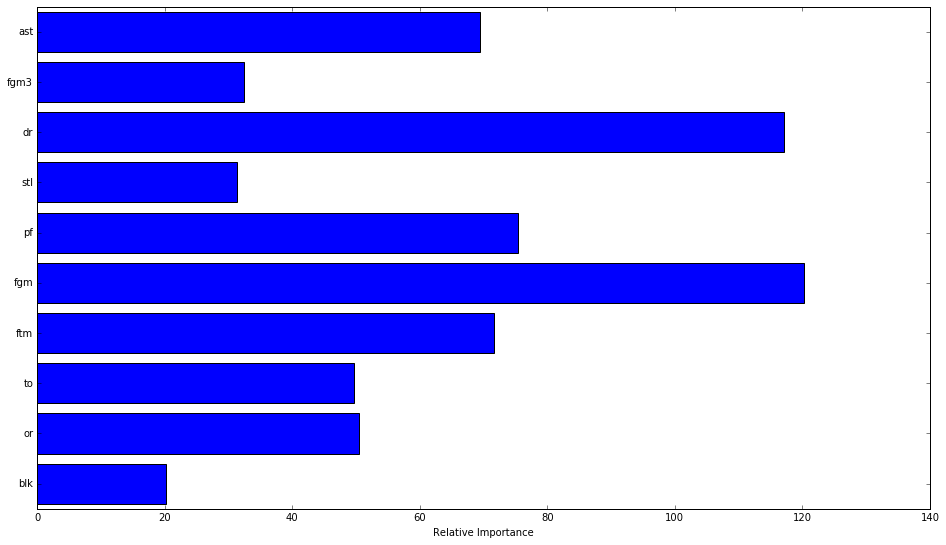

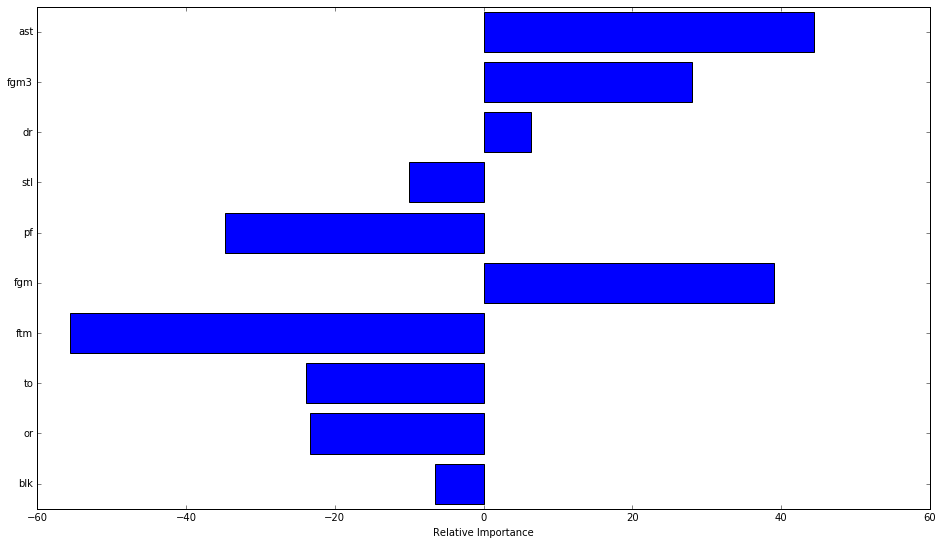

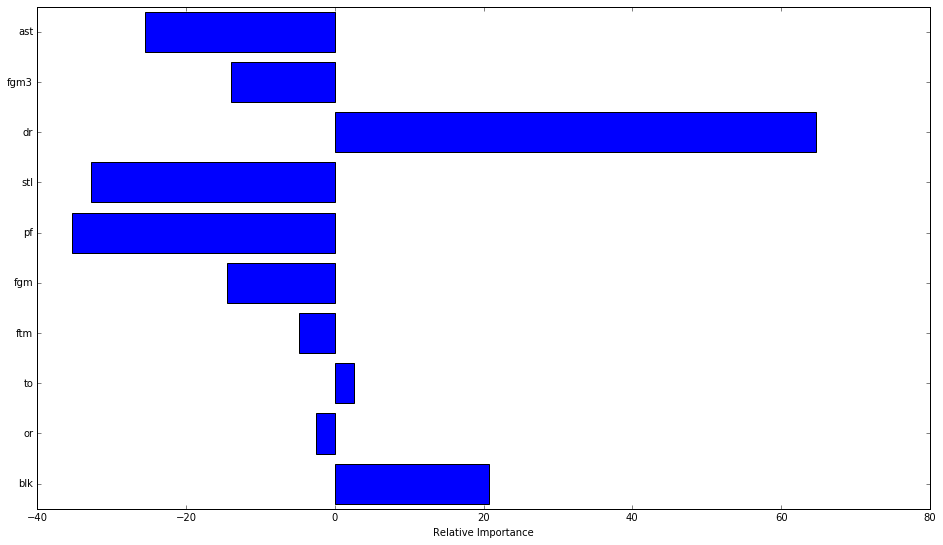

In [3]:
plot_component(X, 0, features_named)
plot_component(X, 1, features_named)
plot_component(X, 2, features_named)

* fgm - field goals made
* fga - field goals attempted
* fgm3 - three pointers made
* fga3 - three pointers attempted
* ftm - free throws made
* fta - free throws attempted
* or - offensive rebounds
* dr - defensive rebounds
* ast - assists
* to - turnovers
* stl - steals
* blk - blocks
* pf - personal fouls

# Scree Visualization
## Kenpom Only, With Rank

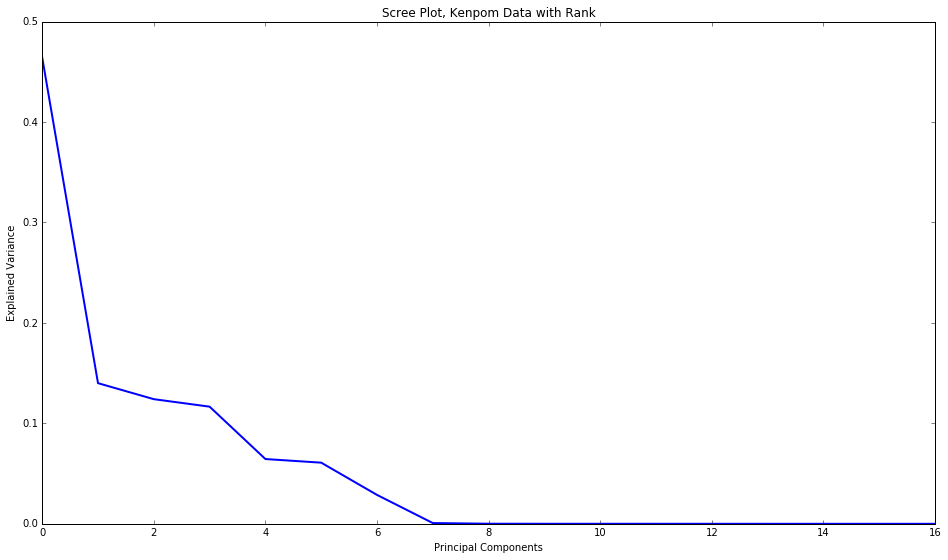

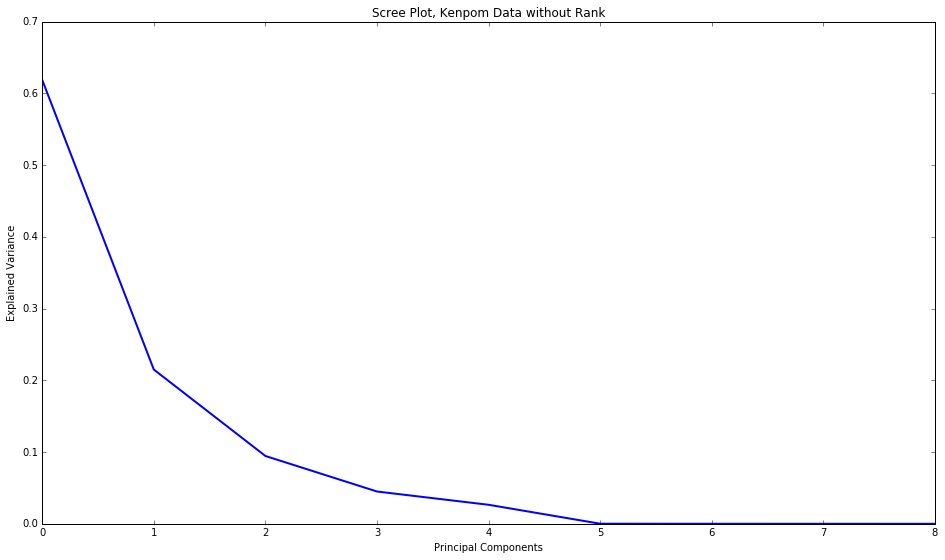

In [7]:
Kenpom = pandas.read_csv(datapath + 'kenpom.csv')

# With Rank
kp_features_rank = ['Pyth', 'AdjustO', 'AdjustO Rank', 'AdjustD', 'AdjustD Rank', 'AdjustT', 'AdjustT Rank', 'Luck', 'Luck Rank', 
    'SOS Pyth', 'SOS Pyth Rank', 'SOS OppO', 'SOS OppO Rank', 'SOS OppD', 'SOS OppD Rank', 'NCSOS Pyth', 'NCSOS Pyth Rank']
features_named = [x for x in kp_features_rank]
X = Kenpom[kp_features_rank]
plot_scree(X)
plt.title('Scree Plot, Kenpom Data with Rank')

# Without Rank

kp_features_norank = ['Pyth', 'AdjustO', 'AdjustD', 'AdjustT', 'Luck', 'SOS Pyth', 'SOS OppO', 'SOS OppD', 'NCSOS Pyth']
features_named = [x for x in kp_features_norank]
X = Kenpom[kp_features_norank]
plot_scree(X)
plt.title('Scree Plot, Kenpom Data without Rank')

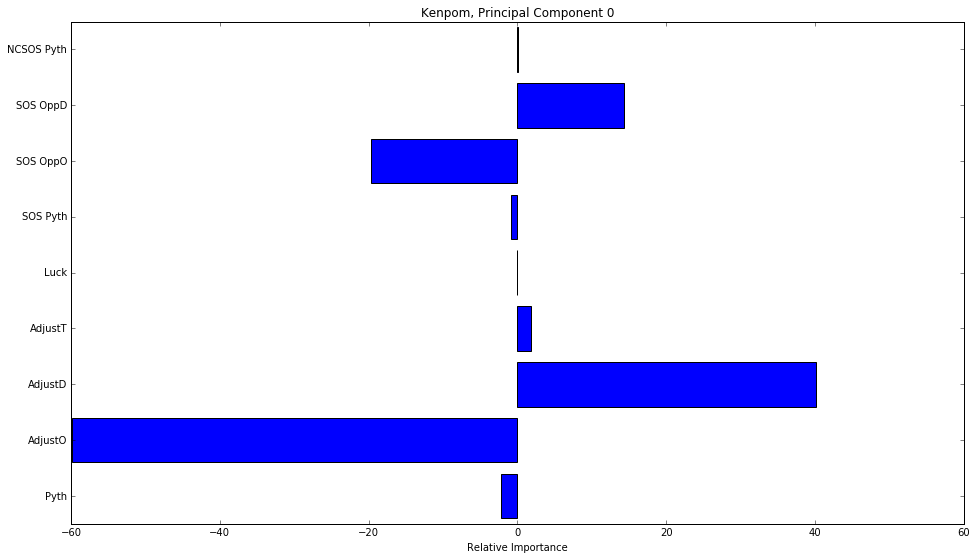

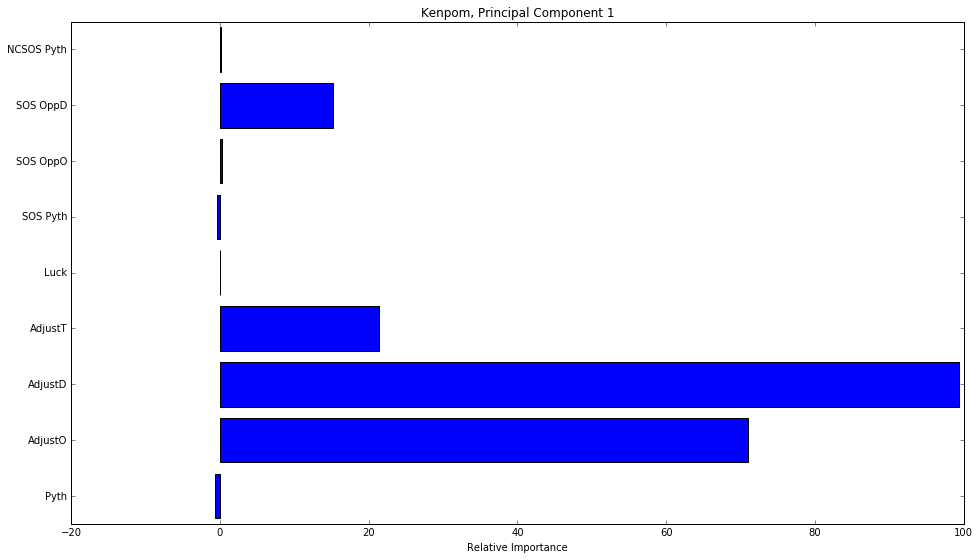

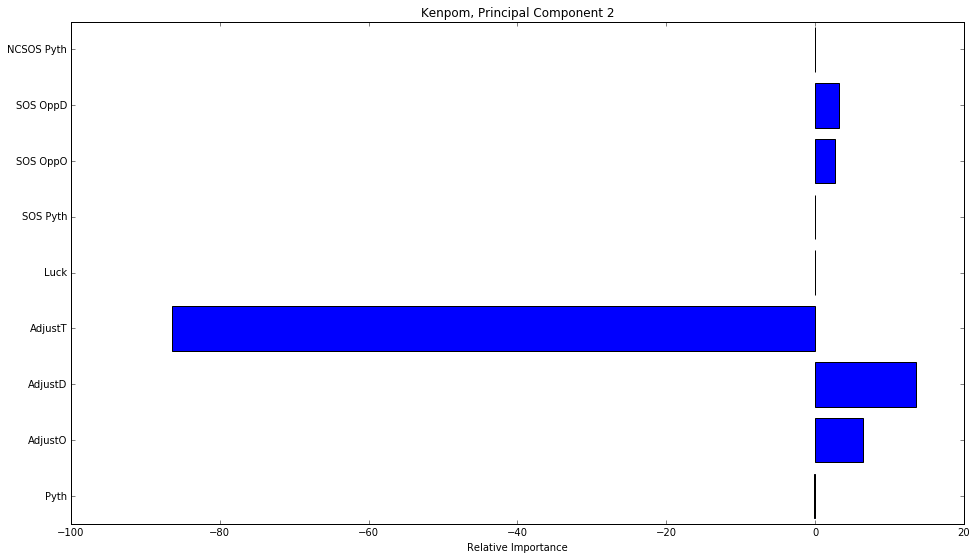

In [8]:
for n in range(0, 3):
    plot_component(X, n, features_named)
    plt.title('Kenpom, Principal Component ' + str(n))

# Covariance Matrix Visualization
## Kenpom and Kaggle